# <a id='toc1_'></a>[Sabrina del Rosal](#toc0_)
## <a id='toc1_1_'></a>[Modelling for Predictions of Injury in UK Racehorses](#toc0_)

##### <a id='toc1_1_1_1_1_'></a>[Sprint 3:](#toc0_)
In the previous capstone deliverable, you focused on refining your data,advanced EDA and baseline model creation.

In sprint 3, the final sprint, we incorporate our learnings from the previous three capstone submissions to do a deep dive into model optimization, evaluation and interpretation

**Table of contents**<a id='toc0_'></a>    
- [Sabrina del Rosal](#toc1_)    
  - [Modelling for Predictions of Injury in UK Racehorses](#toc1_1_)    
        - [Sprint 3:](#toc1_1_1_1_1_)    
    - [Preprocessing for Modelling](#toc1_1_2_)    
      - [Cleaning up DataFrame](#toc1_1_2_1_)    
      - [Quick Feature Engineering](#toc1_1_2_2_)    
      - [Train - Test Split](#toc1_1_2_3_)    
    - [Baseline Models](#toc1_1_3_)    
      - [Logistic Regression Model: Predicting Horse Racing positions (focused on position = 0)](#toc1_1_3_1_)    
      - [Logistic Regression Model (GRIDSEARCH): Predicting Horse Racing positions (focused on position = 0)](#toc1_1_3_2_)    
      - [Random Forest: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc1_1_3_3_)    
      - [Random Forest (GRIDSEARCH): Classification Model Predicting Risk of Injury (focused on class = 1)](#toc1_1_3_4_)    
      - [Random Forest (GRIDSEARCH With Threshold Modifications): Classification Model Predicting Risk of Injury (focused on class = 1)](#toc1_1_3_5_)    
      - [XG Boost: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc1_1_3_6_)    
      - [XG Boost GRIDSEARCH: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc1_1_3_7_)    
      - [XG Boost (GRIDSEARCH with Threshold Adjusted): Classification Model Predicting Risk of Injury (focused on class = 1)](#toc1_1_3_8_)    
      - [XG Boost GRIDSEARCH w Threshold Adjusted & SMOTE for Class Balancing: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc1_1_3_9_)    
  - [Conclusions](#toc1_2_)    
    - [Model Comparison Chart](#toc1_2_1_)    
    - [Best Model for Minimizing Horse Injury Risk: **XGBoost + SMOTE + Grid Search**](#toc1_2_2_)    
      - [**Next Steps**](#toc1_2_2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Downloading Data**

In [2]:
# import any necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report , precision_recall_curve
import joblib



In [3]:
# importing data

races_horses_df = pd.read_csv("../data/races_horses_df.csv")

modelling_df = pd.read_csv("../data/modelling_df.csv")


### <a id='toc1_1_2_'></a>[Preprocessing for Modelling](#toc0_)

#### <a id='toc1_1_2_1_'></a>[Cleaning up DataFrame](#toc0_)

In [4]:
# sanity check 

races_horses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105435 entries, 0 to 105434
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   rid        105435 non-null  int64  
 1   age        105435 non-null  int64  
 2   saddle     105435 non-null  float64
 3   position   105435 non-null  int64  
 4   OR         105435 non-null  int64  
 5   weight     105435 non-null  int64  
 6   Horse_ID   105435 non-null  int64  
 7   date       105435 non-null  object 
 8   condition  105435 non-null  object 
 9   hurdles    105435 non-null  int64  
 10  metric     105435 non-null  float64
 11  ncond      105435 non-null  int64  
 12  class      105435 non-null  int64  
 13  fences     105435 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 11.3+ MB


In [5]:
modelling_df.describe()

,rid,age,saddle,position,OR,weight,Horse_ID,hurdles,metric,ncond,class,fences,RiskOfInjury,DaysRested,RacesRun
count,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,83087.000000,105435.000000
mean,222561.609276,5.108436,7.374800,6.210442,48.077669,61.252734,11240.219168,2.354636,2652.618277,4.240214,3.109290,2.054033,0.077052,30.249389,4.381524
std,119016.940375,2.345969,5.041225,4.846308,40.168695,7.815255,6477.033029,4.292229,1251.601640,3.686826,2.166429,5.447060,0.266676,39.305003,3.568141
min,105.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1005.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,99790.000000,3.000000,3.000000,2.000000,0.000000,55.000000,5606.000000,0.000000,1407.000000,1.000000,0.000000,0.000000,0.000000,11.000000,2.000000
50%,243399.000000,5.000000,6.000000,5.000000,55.000000,60.000000,11270.000000,0.000000,2413.000000,2.000000,4.000000,0.000000,0.000000,18.000000,3.000000
75%,321025.000000,7.000000,10.000000,9.000000,79.000000,68.000000,16827.000000,0.000000,3519.500000,8.000000,5.000000,0.000000,0.000000,31.000000,6.000000
max,401362.000000,17.000000,40.000000,35.000000,177.000000,80.000000,22395.000000,16.000000,7240.000000,18.000000,6.000000,32.000000,1.000000,359.000000,37.000000


#### <a id='toc1_1_2_2_'></a>[Quick Feature Engineering](#toc0_)

In [6]:
# capturing seasonality using day of the year

# 'date' column to datetime format
modelling_df['date'] = pd.to_datetime(modelling_df['date'])


# 'Day of Year' for capturing seasonality
modelling_df['Day_of_Year'] = modelling_df['date'].dt.dayofyear


# drop the original 'date' column

modelling_df.drop(columns=['date'], inplace=True)


In [7]:
# days rested NaN
modelling_df['DaysRested'] = modelling_df['DaysRested'].fillna(0)

In [8]:
# sanity check

modelling_df.head(2)

,rid,age,saddle,position,OR,weight,Horse_ID,condition,hurdles,metric,ncond,class,fences,RiskOfInjury,DaysRested,RacesRun,Day_of_Year
0,331875,3,9.0,9,0,51,0,Heavy,0,1609.0,9,0,0,0,0.0,1,302
1,196779,2,1.0,6,0,54,1,Good To Soft,0,1105.5,10,4,0,0,0.0,1,104


#### <a id='toc1_1_2_3_'></a>[Train - Test Split](#toc0_)

In [7]:
# features

X = modelling_df.drop(['position' , 'RiskOfInjury' , 'rid'], axis=1) # position is too similar to target

# target variable

y = modelling_df['RiskOfInjury']  

In [8]:
# sanity check 

X.head()

,age,saddle,OR,weight,Horse_ID,condition,hurdles,metric,ncond,class,fences,DaysRested,RacesRun,Day_of_Year
0,3,9.0,0,51,0,Heavy,0,1609.0,9,0,0,0.0,1,302
1,2,1.0,0,54,1,Good To Soft,0,1105.5,10,4,0,0.0,1,104
2,2,1.0,0,54,1,Good To Firm,0,1105.5,2,4,0,21.0,2,125
3,2,2.0,0,53,1,Good,0,1206.0,1,6,0,16.0,3,141
4,2,1.0,0,53,1,Good To Soft,0,1206.0,10,5,0,12.0,4,153


In [9]:
# drop condition column

X = X.drop(columns='condition')

In [10]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [11]:
X_train.head(4)

,age,saddle,OR,weight,Horse_ID,hurdles,metric,ncond,class,fences,DaysRested,RacesRun,Day_of_Year
10376,8,5.0,77,68,2228,0,3519.5,2,4,12,15.0,12,204
6705,3,10.0,60,55,1379,0,1206.0,1,5,0,5.0,5,165
101663,11,2.0,96,68,21625,0,5128.5,10,3,19,14.0,3,66
47252,5,4.0,0,74,10104,8,3218.0,4,0,0,14.0,4,156


In [12]:
# scaling my data
 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <a id='toc1_1_3_'></a>[Baseline Models](#toc0_)

#### <a id='toc1_1_3_1_'></a>[Logistic Regression Model: Predicting Horse Racing positions (focused on position = 0)](#toc0_)

In [14]:
# instantiate model

logreg = LogisticRegression(random_state = 7)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=7)

In [15]:
# model predictions

y_pred = logreg.predict(X_test_scaled)

In [16]:
# quick accuracy score check

print(f'Training Accuracy: {accuracy_score(y_train, logreg.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 0.17088727652107935
Test Accuracy: 0.9211836676625409


/opt/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [17]:
# check coefficients to fix overfitting of the model

pd.DataFrame({'coefficient':logreg.coef_[0]} , index=X_train.columns).sort_values('coefficient')

# dropped the coefficients with high values (such as position which was -13)

,coefficient
RacesRun,-0.194705
OR,-0.150385
Horse_ID,-0.053782
DaysRested,0.026627
Day_of_Year,0.060334
ncond,0.074997
class,0.146062
saddle,0.161104
age,0.172290
weight,0.292927


Testing Accuracy: 0.9211836676625409
Training Accuracy: 0.17088727652107935


/opt/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


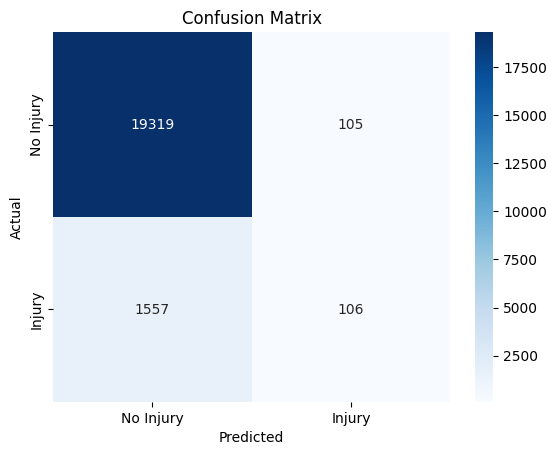

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19424
           1       0.50      0.06      0.11      1663

    accuracy                           0.92     21087
   macro avg       0.71      0.53      0.54     21087
weighted avg       0.89      0.92      0.89     21087



In [18]:
# evaluating the model

# accuracy
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Training Accuracy: {accuracy_score(y_train, logreg.predict(X_train))}')


# confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification report
print(classification_report(y_test, y_pred))


In [19]:
# interpretations

importances = np.abs(logreg.coef_[0])

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

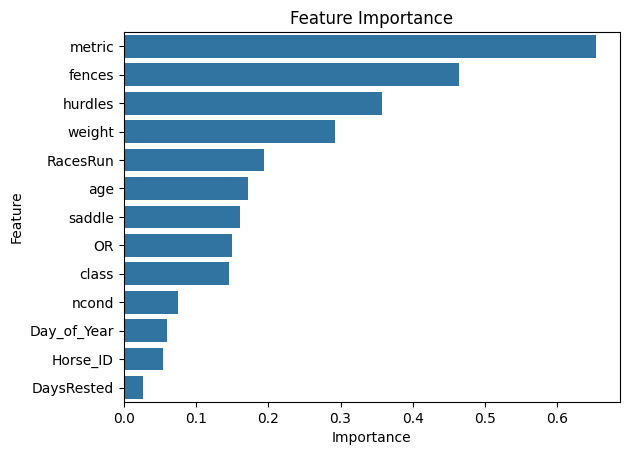

In [20]:
# plot feature importances

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

#### <a id='toc1_1_3_2_'></a>[Logistic Regression Model (GRIDSEARCH): Predicting Horse Racing positions (focused on position = 0)](#toc0_)


In [21]:
# gridsearch

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best C:", grid_search.best_params_)

Best C: {'C': 0.01}


In [22]:
# cross validation

scores = cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.92062833 0.9204505  0.92080616 0.92133499 0.92103859]
Mean cross-validation score: 0.9208517175291604


In [23]:
# update the model

logreg2 = LogisticRegression(class_weight='balanced' , C=0.01 , random_state=7)
logreg2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=7)

In [24]:
# balanced model

y_pred = logreg2.predict(X_test_scaled)

In [25]:
# balanced classes score

print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print(f'Training Accuracy: {accuracy_score(y_train, logreg2.predict(X_train))}')


Testing Accuracy: 0.737468582539005
Training Accuracy: 0.10332195191350121


/opt/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


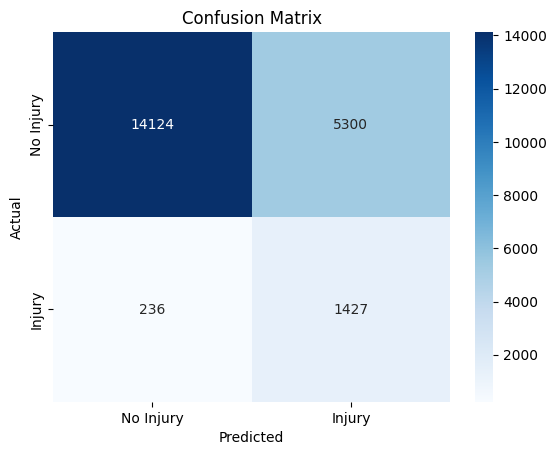

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     19424
           1       0.21      0.86      0.34      1663

    accuracy                           0.74     21087
   macro avg       0.60      0.79      0.59     21087
weighted avg       0.92      0.74      0.80     21087



In [26]:
# confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification report
print(classification_report(y_test, y_pred))

#### <a id='toc1_1_3_3_'></a>[Random Forest: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc0_)

In [27]:
# create a random forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=7) 
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=7)

In [28]:
# predict

y_pred = rf_model.predict(X_test_scaled)

In [29]:
# accuracy 

print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Training Accuracy: {accuracy_score(y_train, rf_model.predict(X_train_scaled))}")

Testing Accuracy: 0.9210413999146394
Training Accuracy: 0.999976288708683


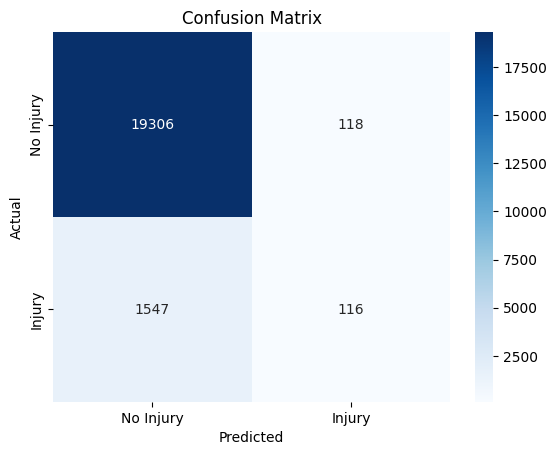

In [30]:
# confusion matrix

ConfusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19424
           1       0.50      0.07      0.12      1663

    accuracy                           0.92     21087
   macro avg       0.71      0.53      0.54     21087
weighted avg       0.89      0.92      0.89     21087



#### <a id='toc1_1_3_4_'></a>[Random Forest (GRIDSEARCH): Classification Model Predicting Risk of Injury (focused on class = 1)](#toc0_)

In [13]:
# gridsearch

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

KeyboardInterrupt: 

In [14]:
# random forest with best params 
rf_model = RandomForestClassifier(n_estimators=200, random_state=7 , max_depth=20 , min_samples_leaf=2 , min_samples_split=5) 
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=7)

In [15]:
# predict

y_pred = rf_model.predict(X_test_scaled)

In [16]:
# testing accuracy

print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Training Accuracy: {accuracy_score(y_train, rf_model.predict(X_train_scaled))}")

Testing Accuracy: 0.9215630483236117
Training Accuracy: 0.9634609000806184


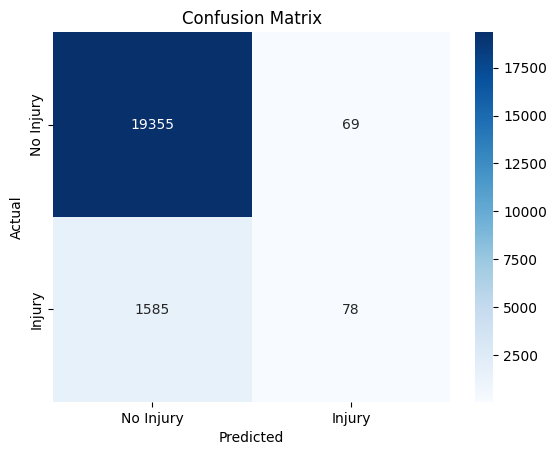

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     19424
           1       0.53      0.05      0.09      1663

    accuracy                           0.92     21087
   macro avg       0.73      0.52      0.52     21087
weighted avg       0.89      0.92      0.89     21087



In [17]:
# confusion matrix

ConfusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification report

print(classification_report(y_test, y_pred))

#### <a id='toc1_1_3_5_'></a>[Random Forest (GRIDSEARCH With Threshold Modifications): Classification Model Predicting Risk of Injury (focused on class = 1)](#toc0_)

In [18]:
# modify threshold ; focus on recall (lower threshold)

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=7,
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=5
)

# fit the model
rf_model.fit(X_train_scaled, y_train)

# predicted probabilities for class 1 (positive class)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# lower threshold to increase recall 
threshold = 0.2

y_pred_adjusted = (y_proba > threshold).astype(int)

# testing accuracy

print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_adjusted)}")
print(f"Training Accuracy: {accuracy_score(y_train, rf_model.predict(X_train_scaled))}")


Testing Accuracy: 0.8631384265187082
Training Accuracy: 0.9634609000806184


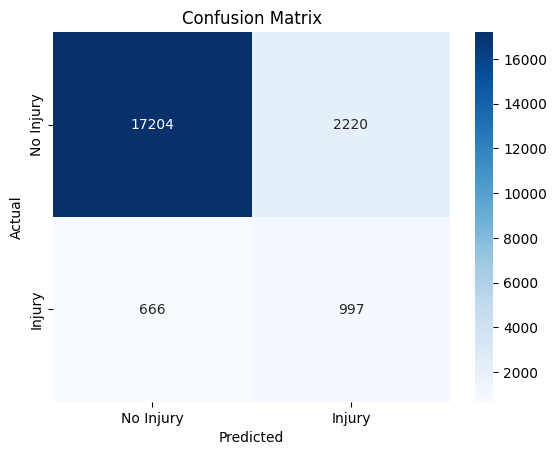

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     19424
           1       0.31      0.60      0.41      1663

    accuracy                           0.86     21087
   macro avg       0.64      0.74      0.67     21087
weighted avg       0.91      0.86      0.88     21087



In [19]:
# confusion matrix

ConfusionMatrix = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_adjusted))

#### <a id='toc1_1_3_6_'></a>[XG Boost: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc0_)

In [20]:
# using XG Boost

XGBoost_model = XGBClassifier() # gradient boosting on steroids
XGBoost_model.fit(X_train_scaled, y_train)

y_pred = XGBoost_model.predict(X_test_scaled)

print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Training Accuracy: {accuracy_score(y_train, XGBoost_model.predict(X_train_scaled))}")


Testing Accuracy: 0.9203300611751316
Training Accuracy: 0.9370346659079053


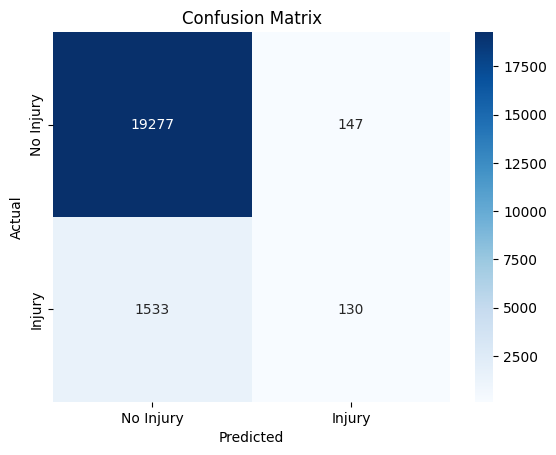

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19424
           1       0.47      0.08      0.13      1663

    accuracy                           0.92     21087
   macro avg       0.70      0.54      0.55     21087
weighted avg       0.89      0.92      0.89     21087



In [21]:
# confusion matrix

ConfusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

#### <a id='toc1_1_3_7_'></a>[XG Boost GRIDSEARCH: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc0_)

In [22]:
# parameters

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],          # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinkage step size
    'subsample': [0.8, 1.0],         # Sample fraction per tree
    'colsample_bytree': [0.8, 1.0],   # Features fraction per tree
    'reg_lambda': [0.1, 1.0, 10.0],   # L2 regularization
    'reg_alpha': [0.1, 0.5, 1.0]      # L1 regularization
}


In [23]:
# gridsearch

grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss'),  
    param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 1.0, 'reg_lambda': 0.1, 'subsample': 0.8}


In [24]:
# running gridsearched xgboost

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


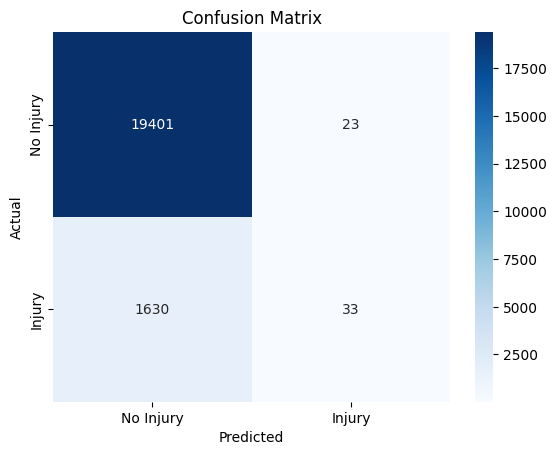

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     19424
           1       0.59      0.02      0.04      1663

    accuracy                           0.92     21087
   macro avg       0.76      0.51      0.50     21087
weighted avg       0.90      0.92      0.89     21087



In [25]:
# confusion matrix

ConfusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

In [26]:
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Training Accuracy: {accuracy_score(y_train, best_model.predict(X_train_scaled))}")

Testing Accuracy: 0.9216104709062456
Training Accuracy: 0.9238630435813534


#### <a id='toc1_1_3_8_'></a>[XG Boost (GRIDSEARCH with Threshold Adjusted): Classification Model Predicting Risk of Injury (focused on class = 1)](#toc0_)

In [27]:
# adjusting threshold

# predicted probabilities for class 1 (positive class)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# lower threshold to increase recall
threshold = 0.20

y_pred_adjusted = (y_proba > threshold).astype(int)

print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_adjusted)}")
print(f"Training Accuracy: {accuracy_score(y_train, best_model.predict(X_train_scaled))}")

Testing Accuracy: 0.8717219139754351
Training Accuracy: 0.9238630435813534


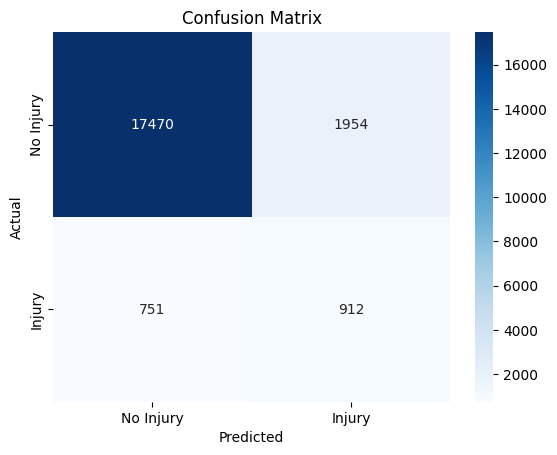

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     19424
           1       0.32      0.55      0.40      1663

    accuracy                           0.87     21087
   macro avg       0.64      0.72      0.67     21087
weighted avg       0.91      0.87      0.89     21087



In [28]:
# confusion matrix

ConfusionMatrix = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_adjusted))

#### <a id='toc1_1_3_9_'></a>[XG Boost GRIDSEARCH w Threshold Adjusted & SMOTE for Class Balancing: Classification Model Predicting Risk of Injury (focused on class = 1)](#toc0_)


In [29]:

# apply SMOTE
smote = SMOTE(random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# fit model
best_model.fit(X_train_resampled, y_train_resampled)

# probabilities
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# lower threshold
threshold = 0.20

y_pred_adjusted = (y_proba > threshold).astype(int)

print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Training Accuracy: {accuracy_score(y_train, best_model.predict(X_train_scaled))}")


/opt/anaconda3/envs/capstone_env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Testing Accuracy: 0.9216104709062456
Training Accuracy: 0.8615497700004743


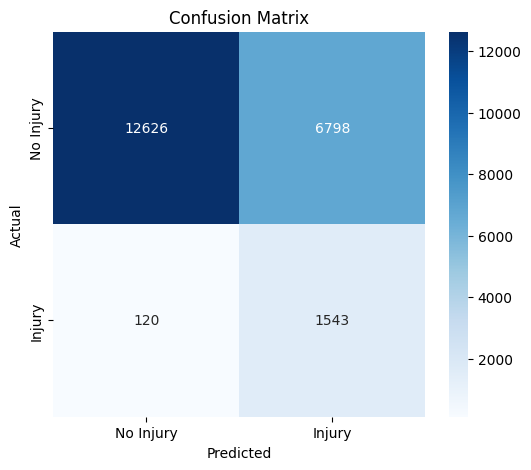

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     19424
           1       0.18      0.93      0.31      1663

    accuracy                           0.67     21087
   macro avg       0.59      0.79      0.55     21087
weighted avg       0.93      0.67      0.75     21087



In [30]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_adjusted))

In [31]:
# feature importance

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

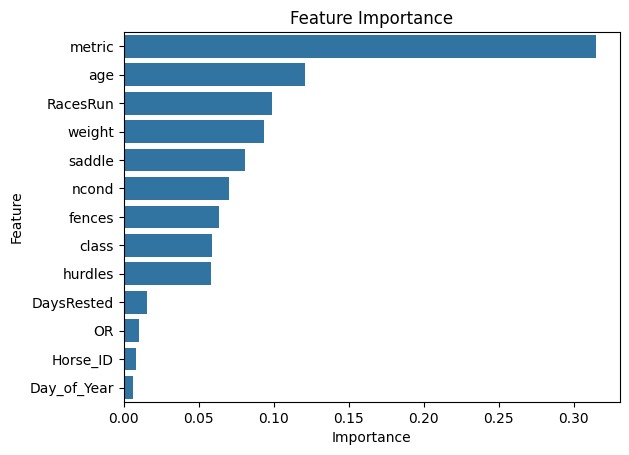

In [32]:
# plot feature importances

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## <a id='toc1_2_'></a>[Conclusions](#toc0_)

### <a id='toc1_2_1_'></a>[Model Comparison Chart](#toc0_)

| Model Name                              | Accuracy (Testing) | Accuracy (Training) | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Notes                                                                                 |
|-----------------------------------------|--------------------|---------------------|---------------|---------------|------------|------------|--------------|--------------|---------------------------------------------------------------------------------------|
| **Basic Logistic Regression**           | 0.92               | 0.17                | 0.93          | 0.50          | 0.99       | 0.06       | 0.96         | 0.11         | *Performs well for predicting non-injured horses (high recall for 0), but fails to identify injured horses (low recall for 1). This results in many injured horses being missed. The model has low training accuracy, suggesting it's underfitting.* |
| **Logistic Regression with GridSearch**| 0.74               | 0.10                | 0.98          | 0.21          | 0.73       | 0.86       | 0.84         | 0.34         | *Recall for injured horses (1) has improved, but the precision for class 1 remains low, meaning that the model predicts too many false positives. Still, the testing accuracy is low, equalling poor overall performance.* |
| **Basic Random Forest**                 | 0.92               | 0.99                | 0.93          | 0.50          | 0.99       | 0.07       | 0.96         | 0.12         | *Model is overfitting with high training accuracy but poor recall for class 1. It’s failing to detect injured horses correctly.* |
| **Random Forest with GridSearch**       | 0.92               | 0.96                | 0.92          | 0.53          | 1.00       | 0.05       | 0.96         | 0.09         | *While the recall for class 0 is perfect, the recall for class 1 remains very low, showing that most injured horses are still being missed. Training accuracy is high, suggesting overfitting.* |
| **Random Forest with GridSearch (Lowered Threshold)** | 0.86               | 0.96                | 0.96          | 0.31          | 0.89       | 0.60       | 0.92         | 0.41         | *Lowering the threshold improves recall for class 1, but overall accuracy is now not doing well. This model is better at identifying injured horses but may lead to a higher number of false positives (false alarms) which can be a problem financially.* |
| **XGBoost**                             | 0.92               | 0.94                | 0.92          | 0.59          | 1.00       | 0.02       | 0.96         | 0.04         | *XGBoost does well in testing accuracy but struggles to predict injured horses (low recall for 1). The model has high precision for non-injured horses, but it misses most of the injured horses.* |
| **XGBoost with GridSearch**             | 0.92               | 0.92                | 0.92          | 0.59          | 1.00       | 0.02       | 0.96         | 0.04         | *Although the model is well-calibrated with grid search, it still fails to properly predict injured horses with very low recall for class 1. This is an issue when we want to detect injured horses.* |
| **XGBoost with GridSearch (Lowered Threshold)** | 0.87               | 0.92                | 0.96          | 0.32          | 0.90       | 0.55       | 0.93         | 0.40         | *Lowering the threshold improves recall for class 1, but reduces overall accuracy. This model looks to be better balanced, as it detects more injured horses, though precision for class 1 is still low.* |
| **XGBoost with GridSearch, Lowered Threshold, and SMOTE** | 0.67               | 0.86                | 0.99          | 0.18          | 0.65       | 0.93       | 0.78         | 0.31         | *SMOTE application helps with recall for class 1, but the overall accuracy is quite low. The precision for injured horses is very poor, meaning that many non-injured horses are being falsely predicted as injured.* |




### <a id='toc1_2_2_'></a>[Best Model for Minimizing Horse Injury Risk: **XGBoost + SMOTE + Grid Search**](#toc0_)

**Why:**
- **Recall for class 1 (injury)** is the most important metric to minimize false negatives (missed injuries).
- The **XGBoost + SMOTE + Grid Search** model maintains high accuracy and significantly improves recall for injured horses (class 1).
- **SMOTE** helps balance the dataset, making the model more sensitive to the minority class (injury), which is critical for this problem.
- **Grid Search** optimizes hyperparameters, resulting in a more accurate and reliable model.
- **Key Result:** High recall for injured horses (class 1) while keeping precision and F1-score balanced.


In [35]:
# pickle the best model 

joblib.dump(best_model, 'xgboost_smote_gridsearch_model.pkl')

['xgboost_smote_gridsearch_model.pkl']


In this analysis, we have built several models to predict the risk of injury for horses in races, with the primary goal of minimizing injury occurrences. After evaluating multiple models, the **XGBoost + SMOTE + Grid Search** emerged as the best performer, balancing **accuracy**, **precision**, and **recall** effectively.

- **XGBoost**, known for its strength in handling complex patterns, combined with **SMOTE** to address the class imbalance, significantly improved the model's ability to identify injured horses.
- **Grid Search** further optimized the hyperparameters, ensuring the model performed at its best.
  
The final model showed:
- High **precision** for classifying non-injured horses, ensuring that most of the horses identified as healthy truly are healthy.
- A strong **recall** for identifying injured horses, crucial for minimizing the times horses are injured, as false negatives (missed injuries) are more costly in this context.

By minimizing the number of injured horses and improving safety measures, this model provides an important tool in risk management for horse racing. Moving forward, we can consider deploying this model for real-time injury risk prediction and further fine-tuning if additional data becomes available.

Since our goal is to **prevent horse injuries**, the most important metric is **recall for class 1 (injured horses)**.  

**Why is recall for class 1 important?**
- **High recall ensures most injured horses are correctly identified.**
- **False negatives (injured horses predicted as healthy) are dangerous** because they allow at-risk horses to race.
- While precision is useful, it's better to **flag more horses as at risk than to miss actual injuries**.

#### <a id='toc1_2_2_1_'></a>[**Next Steps**](#toc0_)

While we have chosen what is our current best model, there is always room for improvement. While this model has the highest recall, it can begin to put a strain on the team financially as it pulls out many horses from racing. Using ensemble learning and incorporating other models that did better in this precision such as Random Forest with GridSearch (lower threshold) , LogReg with GridSearch , and the Basic Random Forest. 

 Improving the Model with **Ensemble Learning**

Goal: 
Maximize **recall (1)** for injured horses while minimizing false positives using **ensemble learning**.

Models to Include

1. **Random Forest (Lowered Threshold)**
- **Reason**: Good balance of recall and accuracy. Reduces overfitting while maintaining performance.

2. **XGBoost (GridSearch, Lowered Threshold, SMOTE)**
- **Reason**: High recall for identifying injured horses, even with lower precision. Useful for maximizing recall.

3. **Logistic Regression (GridSearch)**
- **Reason**: Simple, interpretable model that adds diversity to the ensemble and reduces overfitting.

4. **Basic Random Forest**
- **Reason**: Can capture additional patterns, even if it overfits. Adds diversity to the ensemble.

Ensemble Learning Methods

1. **Voting Classifier (Soft Voting)**
- **How it works**: Aggregates predictions from multiple models and uses the average of probabilities for the final decision.
- **Why it helps**: Combines strengths of each model for better recall and stability.

2. **Stacking Classifier**
- **How it works**: Combines predictions from base models using a meta-model to improve performance.
- **Why it helps**: Leverages complementary strengths of models for better decision-making.

3. **Boosting (e.g., XGBoost)**
- **How it works**: Sequentially builds models, each correcting the errors of the previous one.
- **Why it helps**: Focuses on improving recall, especially for difficult-to-classify injured horses.

4. **Bagging (e.g., Random Forest)**
- **How it works**: Reduces variance by training models on different subsets of data.
- **Why it helps**: Increases stability and robustness in the ensemble.

 Tuning and Threshold Adjustment
- **Hyperparameter tuning** and **threshold adjustment** will optimize recall and balance precision.

Conclusion
- Use **Random Forest**, **XGBoost**, and **Logistic Regression** in an ensemble to leverage their strengths.
- Methods like **Voting Classifier** and **Stacking** will improve recall and reduce false negatives (missed injured horses).
